In [91]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [93]:
iris = load_iris()
X = iris.data  # Características: shape (150, 4)
y = iris.target  # Etiquetas: 0, 1, 2


In [95]:
# Codificar las etiquetas en formato one-hot
y_categorical = to_categorical(y, num_classes=3)

In [97]:
# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # shape (150, 4, 1)

In [101]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42, stratify=y
)

Las RNNs esperan una entrada con forma (muestras, timesteps, features). Dado que tus datos tienen 4 características y no son secuenciales, una opción es tratar cada característica como un timestep con 1 feature

In [141]:
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases de salida
])

C:\Users\pere amat\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [145]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.2775 - loss: 1.1450 - val_accuracy: 0.7667 - val_loss: 0.8971
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7698 - loss: 0.8469 - val_accuracy: 0.7333 - val_loss: 0.7118
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8346 - loss: 0.6512 - val_accuracy: 0.7667 - val_loss: 0.5843
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8360 - loss: 0.5137 - val_accuracy: 0.8000 - val_loss: 0.5067
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8273 - loss: 0.4469 - val_accuracy: 0.8000 - val_loss: 0.4498
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8571 - loss: 0.3908 - val_accuracy: 0.7667 - val_loss: 0.3853
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8848 - loss: 0.3226 - val_accuracy: 0.8333 - val_loss: 0.3434
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9225 - loss: 0.2594 - val_accuracy: 0.8667 - val_loss: 0.3093


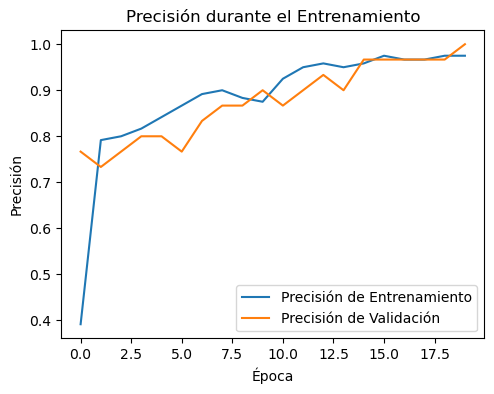

In [147]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()